# Purpose: Do analytically integrable functional fits from 1750-2011 to radiative forcing from greenhouse gases other than CO2, CH4, and N2O, and for contrails, using input from the IPCC Working Group I Fifth Assessment Report references at the end of this notebook. 

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
# import datetime
import matplotlib.pyplot as plt
import numpy as np
# import sympy as sp
from scipy.optimize import curve_fit
import csv
import scipy
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Forcings')

Read the specified input file

In [2]:
df1 = pd.read_excel('WG1AR5_AIISM_Datafiles.xlsx','AII-1-2' )
df1.to_csv('OtherForcings.csv',header=False,index=False)
df1 = pd.read_csv('OtherForcings.csv')
df1.drop(df1.tail(5).index,inplace=True) # drop last 5 rows
df1.drop(df1.columns[[1,-1, -2]], axis=1, inplace=True)
df1.drop(df1.head(1).index, inplace=True)
# df1.drop(df1.columns[1], axis=1,inplace=True)
df1.index = np.arange(0, len(df1))
# print (df1) 

Assign the year values and other green house gases concentration data

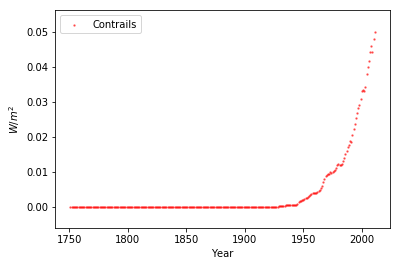

In [3]:
yrs = df1.iloc[:,0:1]
yrsaero = yrs
# print (yrsaero)

o3stra = df1.iloc[:,3].tolist()
o3stra = list(map(float, o3stra))
newo3stra = [x *-1 for x in o3stra]
o3stra = list(map(str, newo3stra))
o3stra = pd.DataFrame({'O3 (Strat)':o3stra})
# print (o3stra)

aerosol = df1.iloc[:,4].tolist()
aerosol = list(map(float, aerosol))
newaerosol = [x *-1 for x in aerosol]
aerosol = list(map(str, newaerosol))
aerosol = pd.DataFrame({'Aerosol (Total)':aerosol})
# print (aerosol)

LUC = df1.iloc[:,5].tolist()
LUC = list(map(float, LUC))
newLUC = [x *-1 for x in LUC]
LUC = list(map(str, newLUC))
LUC = pd.DataFrame({'LUC':LUC})
df1['LUC'] = LUC['LUC']
df1['Aerosol (Total)'] = aerosol['Aerosol (Total)']
df1['O3 (Strat)'] = o3stra['O3 (Strat)']
# print (df1)
df1 = df1.astype(float)

# df.plot(x='Year',y='Deforestation',color = 'r',label ='data')
# df.plot.scatter()
ax = df1.plot.scatter(x="Year", y="Contrails", color = 'r',label ='Contrails', s=2, alpha = 0.5)
ax.set_ylabel("$W/m^2$")
plt.savefig('otherContrails.eps',dpi=1000)
plt.savefig('otherContrails.pdf',dpi=1000)


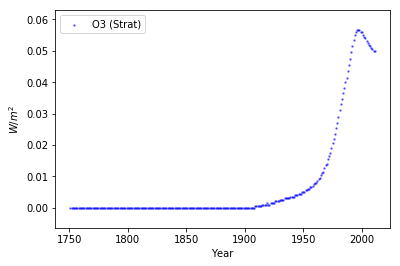

In [4]:
ax1 = df1.plot.scatter(x="Year", y="O3 (Strat)", color = 'b',label ='O3 (Strat)', s=2, alpha = 0.5)
ax1.set_ylabel("$W/m^2$")
plt.savefig('otherO3strat.eps',dpi=1000)
plt.savefig('otherO3strat.pdf',dpi=1000)

Net effect of contrail gases and cirrus clouds

[ 0.16909927 98.34026267 17.81183537]
[1.69099272e-01 2.02634026e+03 1.78118354e+01]


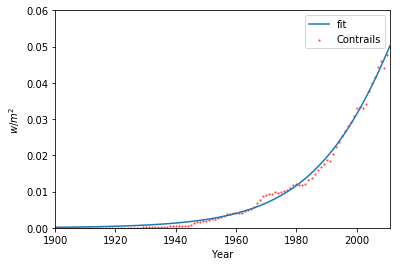

In [5]:
contrail = df1.iloc[:,8:9]
position = int(contrail.ne(0).idxmax())

forcecontrail = contrail.iloc[position:]
yrs = df1.iloc[:,0:1]
yrscontrail = yrs.iloc[position:]

df2 = pd.merge(yrscontrail, forcecontrail, left_index =True, right_index =True,how='outer')
df2 = df2.reset_index(drop=True)
# print (df2)

yrscontrail = df2.iloc[:,0].tolist()
# print (yrscontrail)

forcecontrail = df2.iloc[:,1].tolist()
# print (forcecontrail)

q = list(range(1,len(forcecontrail)+1))

# def logistic(yrscontrail,b1,b2,b3):
#      y = b1 / (1 + np.exp(-(yrscontrail-b2)/b3))
#      return y
def logistic(q,b1,b2,b3):
     y = b1 / (1 + np.exp(-(q-b2)/b3))
     return y

param_bounds=([0,50,0],[1,150,50])
popt, pcov = curve_fit(logistic, q, forcecontrail, bounds=param_bounds)
print (popt)

popt[1] = 1750 + position + popt[1]
print (popt)
yrsuse = range(1750 + position,2012)


df1.plot.scatter(x="Year", y="Contrails", color = 'r',label ='Contrails', s=2, alpha = 0.5)
# yrsuse = list(range(1750 + position,2012)) # plot from year 1928 to 2011
yrsuse = list(range(1900,2012)) # plot from year 1928 to 2011
yrsuse = np.array(yrsuse)
fit = logistic(yrsuse, *popt)
plt.xlabel('Year')
plt.ylabel('$w/m^2$')
plt.xlim(1900,2011) # set x-axis limit for plotting
plt.ylim(0,0.06) # set y-axis limit for plotting
plt.plot(yrsuse,fit, label="fit")
plt.legend(loc='best')
plt.savefig('fitfd.eps',dpi=1000)
plt.savefig('fitfd.pdf',dpi=1000)
plt.show()

Greenhouse Gases Other Than CO2, CH4, N2O

In [6]:
df3 = pd.read_excel('raw data.xlsx')
# df3 = pd.read_excel('raw data - Copy.xlsx')
# print (df3)
# roundyr = df3.iloc[:,0]
# df3.Years = df3.Years.round()
# print (df3)
yrs1 = df3.iloc[:,0:1]
# print (yrs1)
df4 = df1['O3 (Strat)']

# position2 = df1.Year[df1.Year == 1920].index.tolist()
position2 = df1.Year[df1.Year == 1935].index.tolist()
print (position2)
position2 = list(range(position2[0],len(df3)*5+position2[0],5))

df5 = df4.iloc[position2]
df5 = df5.reset_index(drop=True)

# print (df5)
dt1 = df5.tolist()
# print (dt1)

dt2 = df3['Radiative Forcing'].tolist()
# dt2 = list(map(float, dt2))
# print (dt2)
newdt = [x+y for x,y in zip(dt1, dt2)]
# print (newdt)
newforce = list(map(str, newdt))
newforce = pd.DataFrame({'Radiative Forcing':newforce})
df6 = pd.merge(yrs1,newforce, left_index =True, right_index =True,how='outer')
print (df6)


[184]
          Years     Radiative Forcing
0   1934.942529   0.00547524752475269
1   1940.000000   0.00845049504950517
2   1944.942529  0.011425742574257651
3   1950.000000   0.01490099009901013
4   1954.942529    0.0208514851485153
5   1959.885057    0.0327524752475249
6   1964.942529    0.0525792079207923
7   1969.885057     0.085782178217822
8   1974.942529     0.144262376237624
9   1980.000000     0.212168316831683
10  1984.942529     0.273148514851485
11  1990.000000     0.347004950495049
12  1994.942529     0.385207920792079
13  2000.000000     0.395108910891089
14  2004.942529     0.399034653465346
15  2010.000000     0.403960396039604


Define the fitted logistic function and fit data

In [7]:
yrs1 = df6.iloc[:,0]
yrs1 = yrs1.tolist()
newforce = df6.iloc[:,1]
newforce = newforce.tolist()
newforce = [float(i) for i in newforce]

def logistic(yrs1,b1,b2,b3):
     y = b1 / (1 + np.exp(-(yrs1-b2)/b3))
     return y
param_bounds=([0,1500,0],[1,2500,50])
popt,pcov = curve_fit(logistic, yrs1, newforce, bounds=param_bounds)
print (popt)

[4.17722085e-01 1.97952742e+03 7.33418804e+00]


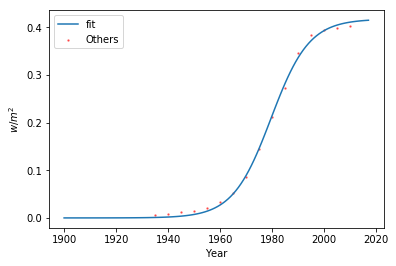

In [8]:
df6 = df6.astype(float)
df6.plot.scatter(x="Years", y="Radiative Forcing", color = 'r',label ='Others', s=2, alpha = 0.5)
t_new = list(range(1900,2018)) # plot from year 1900 to 2017
t = np.array(t_new)
fit0 = logistic(t, *popt)
plt.plot(t,fit0, label ='fit')
plt.xlabel('Year')
plt.ylabel('$w/m^2$')
plt.legend(loc='best')
plt.savefig('fitf.eps',dpi=1000)
plt.savefig('fitf.pdf',dpi=1000)
plt.show()